In [73]:
import numpy as np

In [74]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [75]:
X, y = mnist['data'], mnist['target']

In [76]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [77]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
X_test_scaled = scaler.transform(X_test.astype(np.float64))


In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['distance'],
    'p': [1, 2]
}
gsearch = GridSearchCV(estimator=knn, param_grid=param_grid, cv=3, n_jobs=-1, scoring="accuracy" )
gsearch.fit(X_train_scaled, y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 7], 'p': [1, 2],
                         'weights': ['distance']},
             scoring='accuracy')

In [17]:
from sklearn.metrics import accuracy_score
y_pred = gsearch.predict(X_test_scaled)
accuracy_score(y_test, y_pred)


0.9592

In [87]:
from scipy.ndimage import shift
import matplotlib.pyplot as plt

def shiftImage(image, dx, dy):
    image = image.reshape((28, 28))
    shiftedImage = shift(image, shift=[dy, dx], mode='constant', cval=0)
    return shiftedImage.flatten()

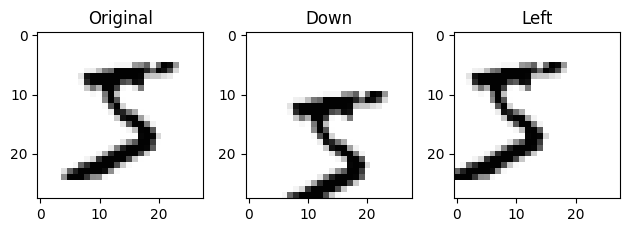

In [79]:
image = X_train.iloc[0].values
shifted_image_down = shiftImage(image, 0, 5)
shifted_image_left = shiftImage(image, -5, 0)

plt.subplot(131); plt.imshow(image.reshape(28, 28), cmap='Greys'); plt.title("Original")
plt.subplot(132); plt.imshow(shifted_image_down, cmap='Greys'); plt.title("Down")
plt.subplot(133); plt.imshow(shifted_image_left, cmap='Greys'); plt.title("Left")
plt.tight_layout()
plt.show()

In [89]:
X_train_array = X_train.to_numpy()
y_train_array = np.array(y_train)

# ✅ Initialize augmentation lists
X_train_augmented = [image for image in X_train_array]  # all are np.array of shape (784,)
y_train_augmented = [label for label in y_train_array]

# ✅ Perform shifts and augment
for dx, dy in ((1, 0), (-1, 0), (0, 1), (0, -1)):
    for image, label in zip(X_train_array, y_train_array):
        shifted_image = shiftImage(image, dx, dy)
        X_train_augmented.append(shifted_image)
        y_train_augmented.append(label)

# ✅ Convert to NumPy arrays safely
X_train_augmented = np.array(X_train_augmented)  # shape will be (N, 784)
y_train_augmented = np.array(y_train_augmented)  # shape will be (N,)

In [90]:
shuffle_idx = np.random.permutation(len(X_train_augmented))
X_train_augmented = X_train_augmented[shuffle_idx]
y_train_augmented = y_train_augmented[shuffle_idx]

In [91]:

knn_clf = KNeighborsClassifier(**gsearch.best_params_)
knn_clf.fit(X_train_augmented, y_train_augmented)

KNeighborsClassifier(n_neighbors=3, p=1, weights='distance')

In [ ]:
y_pred = knn_clf.predict(X_test)
accuracy_score(y_test, y_pred)

C:\Users\Lenovo\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [ ]:
import os
import urllib.request

TITANIC_PATH = os.path.join("datasets", "titanic")
DOWNLOAD_URL = "https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/titanic/"

def fetch_titanic_data(url=DOWNLOAD_URL, path=TITANIC_PATH):
    if not os.path.isdir(path):
        os.makedirs(path)
    for filename in ("train.csv", "test.csv"):
        filepath = os.path.join(path, filename)
        if not os.path.isfile(filepath):
            print("Downloading", filename)
            urllib.request.urlretrieve(url + filename, filepath)

fetch_titanic_data()    

In [ ]:
import pandas as pd

def load_titanic_data(filename, titanic_path=TITANIC_PATH):
    csv_path = os.path.join(titanic_path, filename)
    return pd.read_csv(csv_path)

In [ ]:
train_data = load_titanic_data("train.csv")
test_data = load_titanic_data("test.csv")

In [ ]:
train_data.head()